                                           Alem Fitwi
                                           DIP

# Libraries

In [87]:
import os
import glob

import cv2
import PIL
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec

def showimg(img, title='', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title+', ' + str(img.shape))
    plt.show()
    
def plt_imgs(imgs, colors=None, titles=None, cmaps =None, toa=True, fsize=8):
    # Create subplots
    c = 4
    nimgs = len(imgs)
        
    c = nimgs if nimgs < c else c
    ar = len(imgs)//c
    r = int(np.ceil(len(imgs)/c))
    
    k = np.zeros((imgs[0].shape), np.uint8)
    if r*c-nimgs>0:
        imgs.extend([k]*(r*c-nimgs))   
    nimgs = len(imgs)
    if cmaps is None:
        cmaps = ['gray']*nimgs
    if titles is None:
        titles = ['Img']*nimgs    
    
    fig, axes = plt.subplots(nrows=r,  ncols=c)
    #, gridspec_kw = {'wspace':0.3, 'hspace':0}, figsize=(2*r, 2*c))
    fig.subplots_adjust(hspace=0, wspace=0.1)
    fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    #     fig = plt.figure()
    #     gs = fig.add_gridspec(r, c, hspace=0, wspace=0.1)
    #     axs = gs.subplots(sharex='col', sharey='row')
    
    ic = 0
    for i in range(r):
        for j in range(c):
            axes[i, j].imshow(imgs[ic], cmap=cmaps[ic])
            axes[i, j].set_title(
               titles[ic]+str(ic+1)+':'+str(imgs[ic].shape), 
               fontsize=fsize)
            if toa:
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])
            ic+=True    
            #plt.subplots_adjust(wspace=None, hspace=None)
            #plt.subplots_adjust(wspace=0, hspace=-0.0010)
    if toa:
        for i in range(r):
            for j in range(c):
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])
    for ax in axes.flat:
        ax.label_outer()
    
    # Display the subplots
    #fig.tight_layout(pad=0.2)
    plt.tight_layout(h_pad=0, w_pad=0.1)
    fig.savefig('test.png', dpi=300, bbox_inches='tight')
    plt.show()
    

def plot_rect(img, brect,  color='red', title='', cmap='gray', lw=1):
    x, y, w, h =brect
    fig, ax = plt.subplots(1, 1) 
    ax.imshow(img, cmap=cmap)
    ax.add_patch(mpatches.Rectangle((x, y), w, h, 
                        fc ='none',  
                        ec =color, 
                        lw = lw) ) 
    
    ax.set_title(title)
    plt.show()

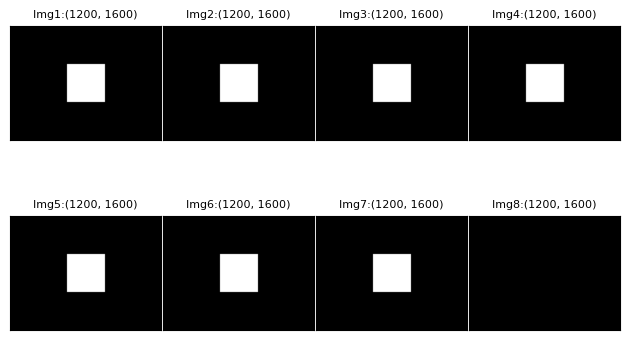

In [88]:
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255
plt_imgs([img]*7)

# Special Plotting

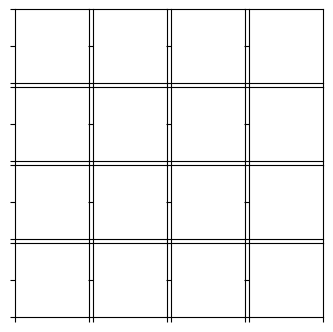

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (4,4))
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

for i in range(16):
   # i = i + 1 # grid spec indexes from 0
    ax1 = plt.subplot(gs1[i])
    plt.axis('on')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')

plt.show()

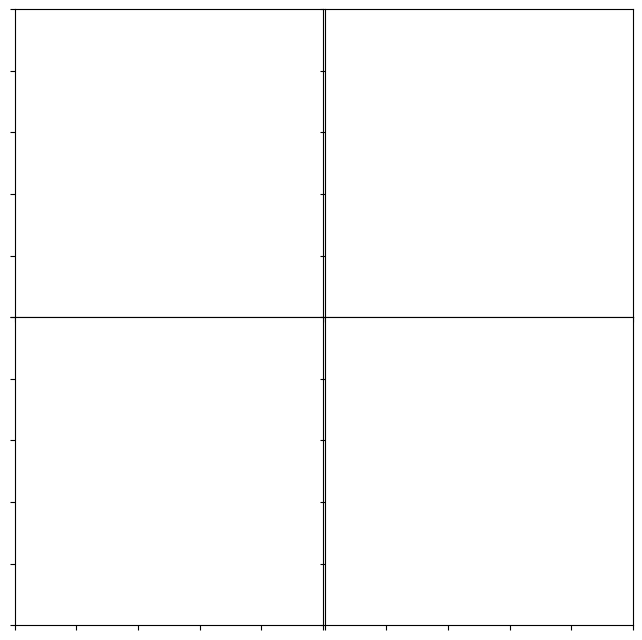

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect('equal')

fig.subplots_adjust(wspace=0, hspace=0)

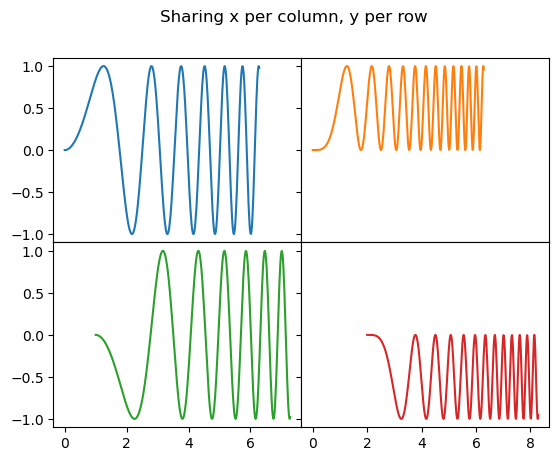

In [35]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

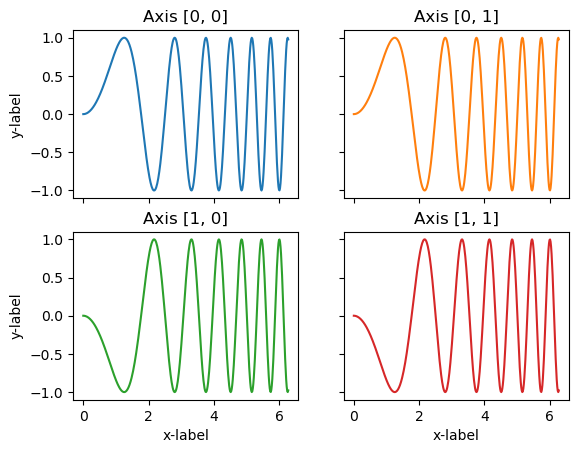

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 4, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.tight_layout(pad=0.1)
    plt.show()

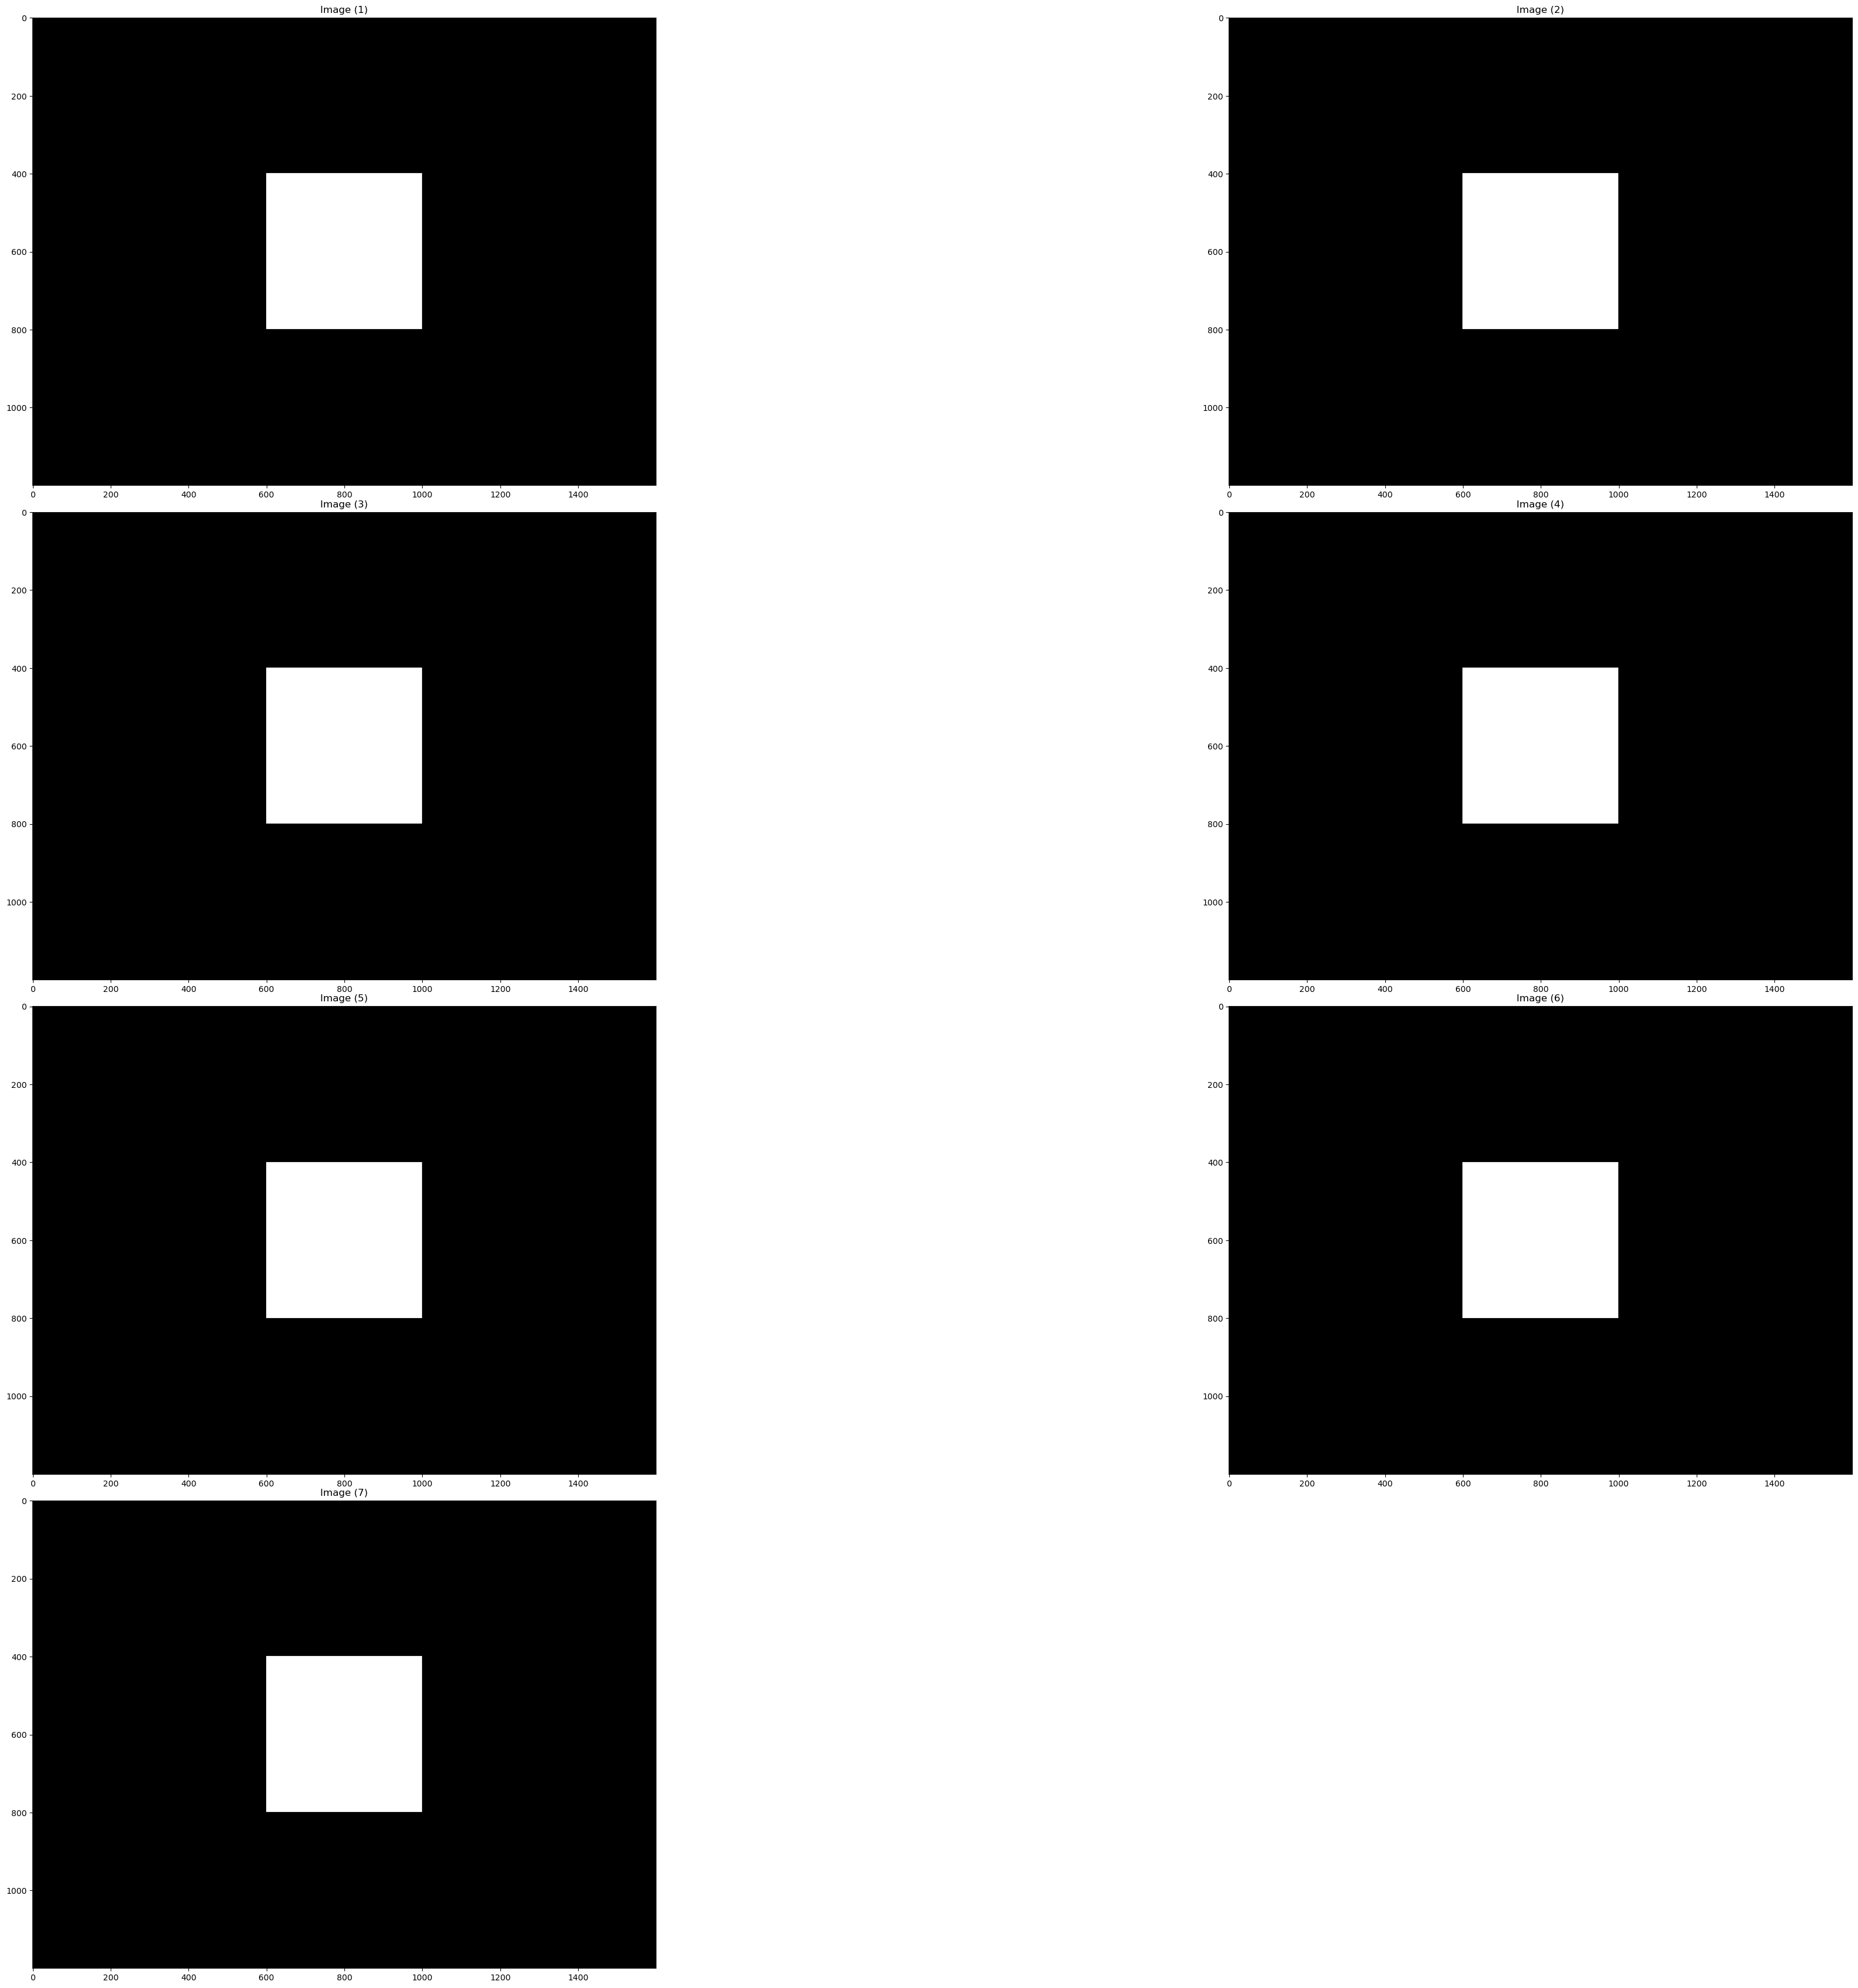

In [90]:
show_images([img]*7)

In [ ]:
def plt_imgs(imgs, colors=None, titles=None, cmaps =None, toa=True, fsize=8):
    # Create subplots
    c = 4
    nimgs = len(imgs)
        
    c = nimgs if nimgs < c else c
    ar = len(imgs)//c
    r = int (np.ceil(len(imgs)/c))
    
    k = np.zeros((imgs[0].shape), np.uint8)
    if r*c-nimgs>0:
        imgs.extend([k]*(r*c-nimgs))   
    nimgs = len(imgs)
    if cmaps is None:
        cmaps = ['gray']*nimgs
    if titles is None:
        titles = ['Img']*nimgs    

In [164]:
def plot_imgs(
                imgs: np.ndarray, 
                cols: int = 4,
                titles: list = None,
                colors: list = None,
                cmaps: list = None, 
                turnoffaxes: bool = True, 
                fsize: int = 8,
                tfsize: int = 8,
                saveplt: str = None,
                ylabels: dict = None
             ) -> bool:
    """Plots and Displays Multiple Images in RxC
       Created by Alem Fitwi, 29 July 2022
    """
    nimgs = len(imgs)
    cols = nimgs if nimgs < cols else cols
    ar = nimgs//cols
    rows = int(np.ceil(len(imgs)/cols))    
    k = np.zeros((imgs[0].shape), np.uint8)
    if rows*cols-nimgs>0:
        imgs.extend([k]*(rows*cols-nimgs))   
    nimgs = len(imgs)
    rows = int(np.ceil(nimgs/cols)) 
    row_list = list(range(0, nimgs, cols))
    
    if cmaps is None:
        cmaps = ['gray']*nimgs
    if titles is None:
        titles = ['Img']*nimgs 
    if ylabels is None:
        ylabels = {str(r):f'Label_{r//cols}' for r in row_list}
    
    plt.figure(figsize=(2*cols, rows*2), dpi=300)
    for i in range(nimgs):
        plt.subplot(rows, cols, i+1)
        plt.imshow(imgs[i],cmap=cmaps[i])
        plt.title(titles[i], fontsize=fsize, color='red')
        plt.rcParams['axes.facecolor']='red'
        if turnoffaxes:
            plt.xticks([])
            plt.yticks([])  
        else:
            plt.tick_params(axis='x', labelsize=tfsize)
            plt.tick_params(axis='y', labelsize=tfsize)
        plt.xlabel(f'(H, W) = {imgs[i].shape}', 
                   fontsize=fsize)
        if str(i) in list(ylabels.keys()):
            plt.ylabel(f'{ylabels[str(i)]}', 
                      rotation=0,
                      fontsize=fsize,
                      labelpad=20) 
            
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.tight_layout(pad=0.01)
    if saveplt is not None:
        plt.savefig(saveplt, dpi=300, 
                bbox_inches='tight')
    plt.show()

In [169]:
def plotax_imgs(
                imgs: np.ndarray, 
                cols: int = 4,
                titles: list = None,
                colors: list = None,
                cmaps: list = None, 
                turnoffaxes: bool = True, 
                fsize: int = 8,
                tfsize: int = 8,
                saveplt: str = None,
                ylabels: dict = None
             ) -> bool:
    """Plots and Displays Multiple Images in RxC
       Created by Alem Fitwi, 29 July 2022
    """
    nimgs = len(imgs)
    cols = nimgs if nimgs < cols else cols
    ar = nimgs//cols
    rows = int(np.ceil(len(imgs)/cols))    
    k = np.zeros((imgs[0].shape), np.uint8)
    if rows*cols-nimgs>0:
        imgs.extend([k]*(rows*cols-nimgs))   
    nimgs = len(imgs)
    rows = int(np.ceil(nimgs/cols)) 
    row_list = list(range(0, nimgs, cols))
    
    if cmaps is None:
        cmaps = ['gray']*nimgs
    if titles is None:
        titles = ['Img']*nimgs 
    if ylabels is None:
        ylabels = {str(r):f'Label_{r//cols}' for r in row_list}
    
    plt.figure(figsize=(2*cols, rows*2), dpi=300)
    for i in range(nimgs):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(imgs[i],cmap=cmaps[i])
        ax.set_title(titles[i], fontsize=fsize, color='red')
        ax.set_facecolor("red")
        if turnoffaxes:
            ax.set_xticks([])
            ax.set_yticks([])  
        else:
            ax.tick_params(axis='x', labelsize=tfsize)
            ax.tick_params(axis='y', labelsize=tfsize)
        ax.set_xlabel(f'(H, W) = {imgs[i].shape}', 
                   fontsize=fsize)
        if str(i) in list(ylabels.keys()):
            plt.ylabel(f'{ylabels[str(i)]}', 
                      rotation=0,
                      fontsize=fsize,
                      labelpad=20) 
            
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.tight_layout(pad=0.01)
    if saveplt is not None:
        plt.savefig(saveplt, dpi=300, 
                bbox_inches='tight')
    plt.show()

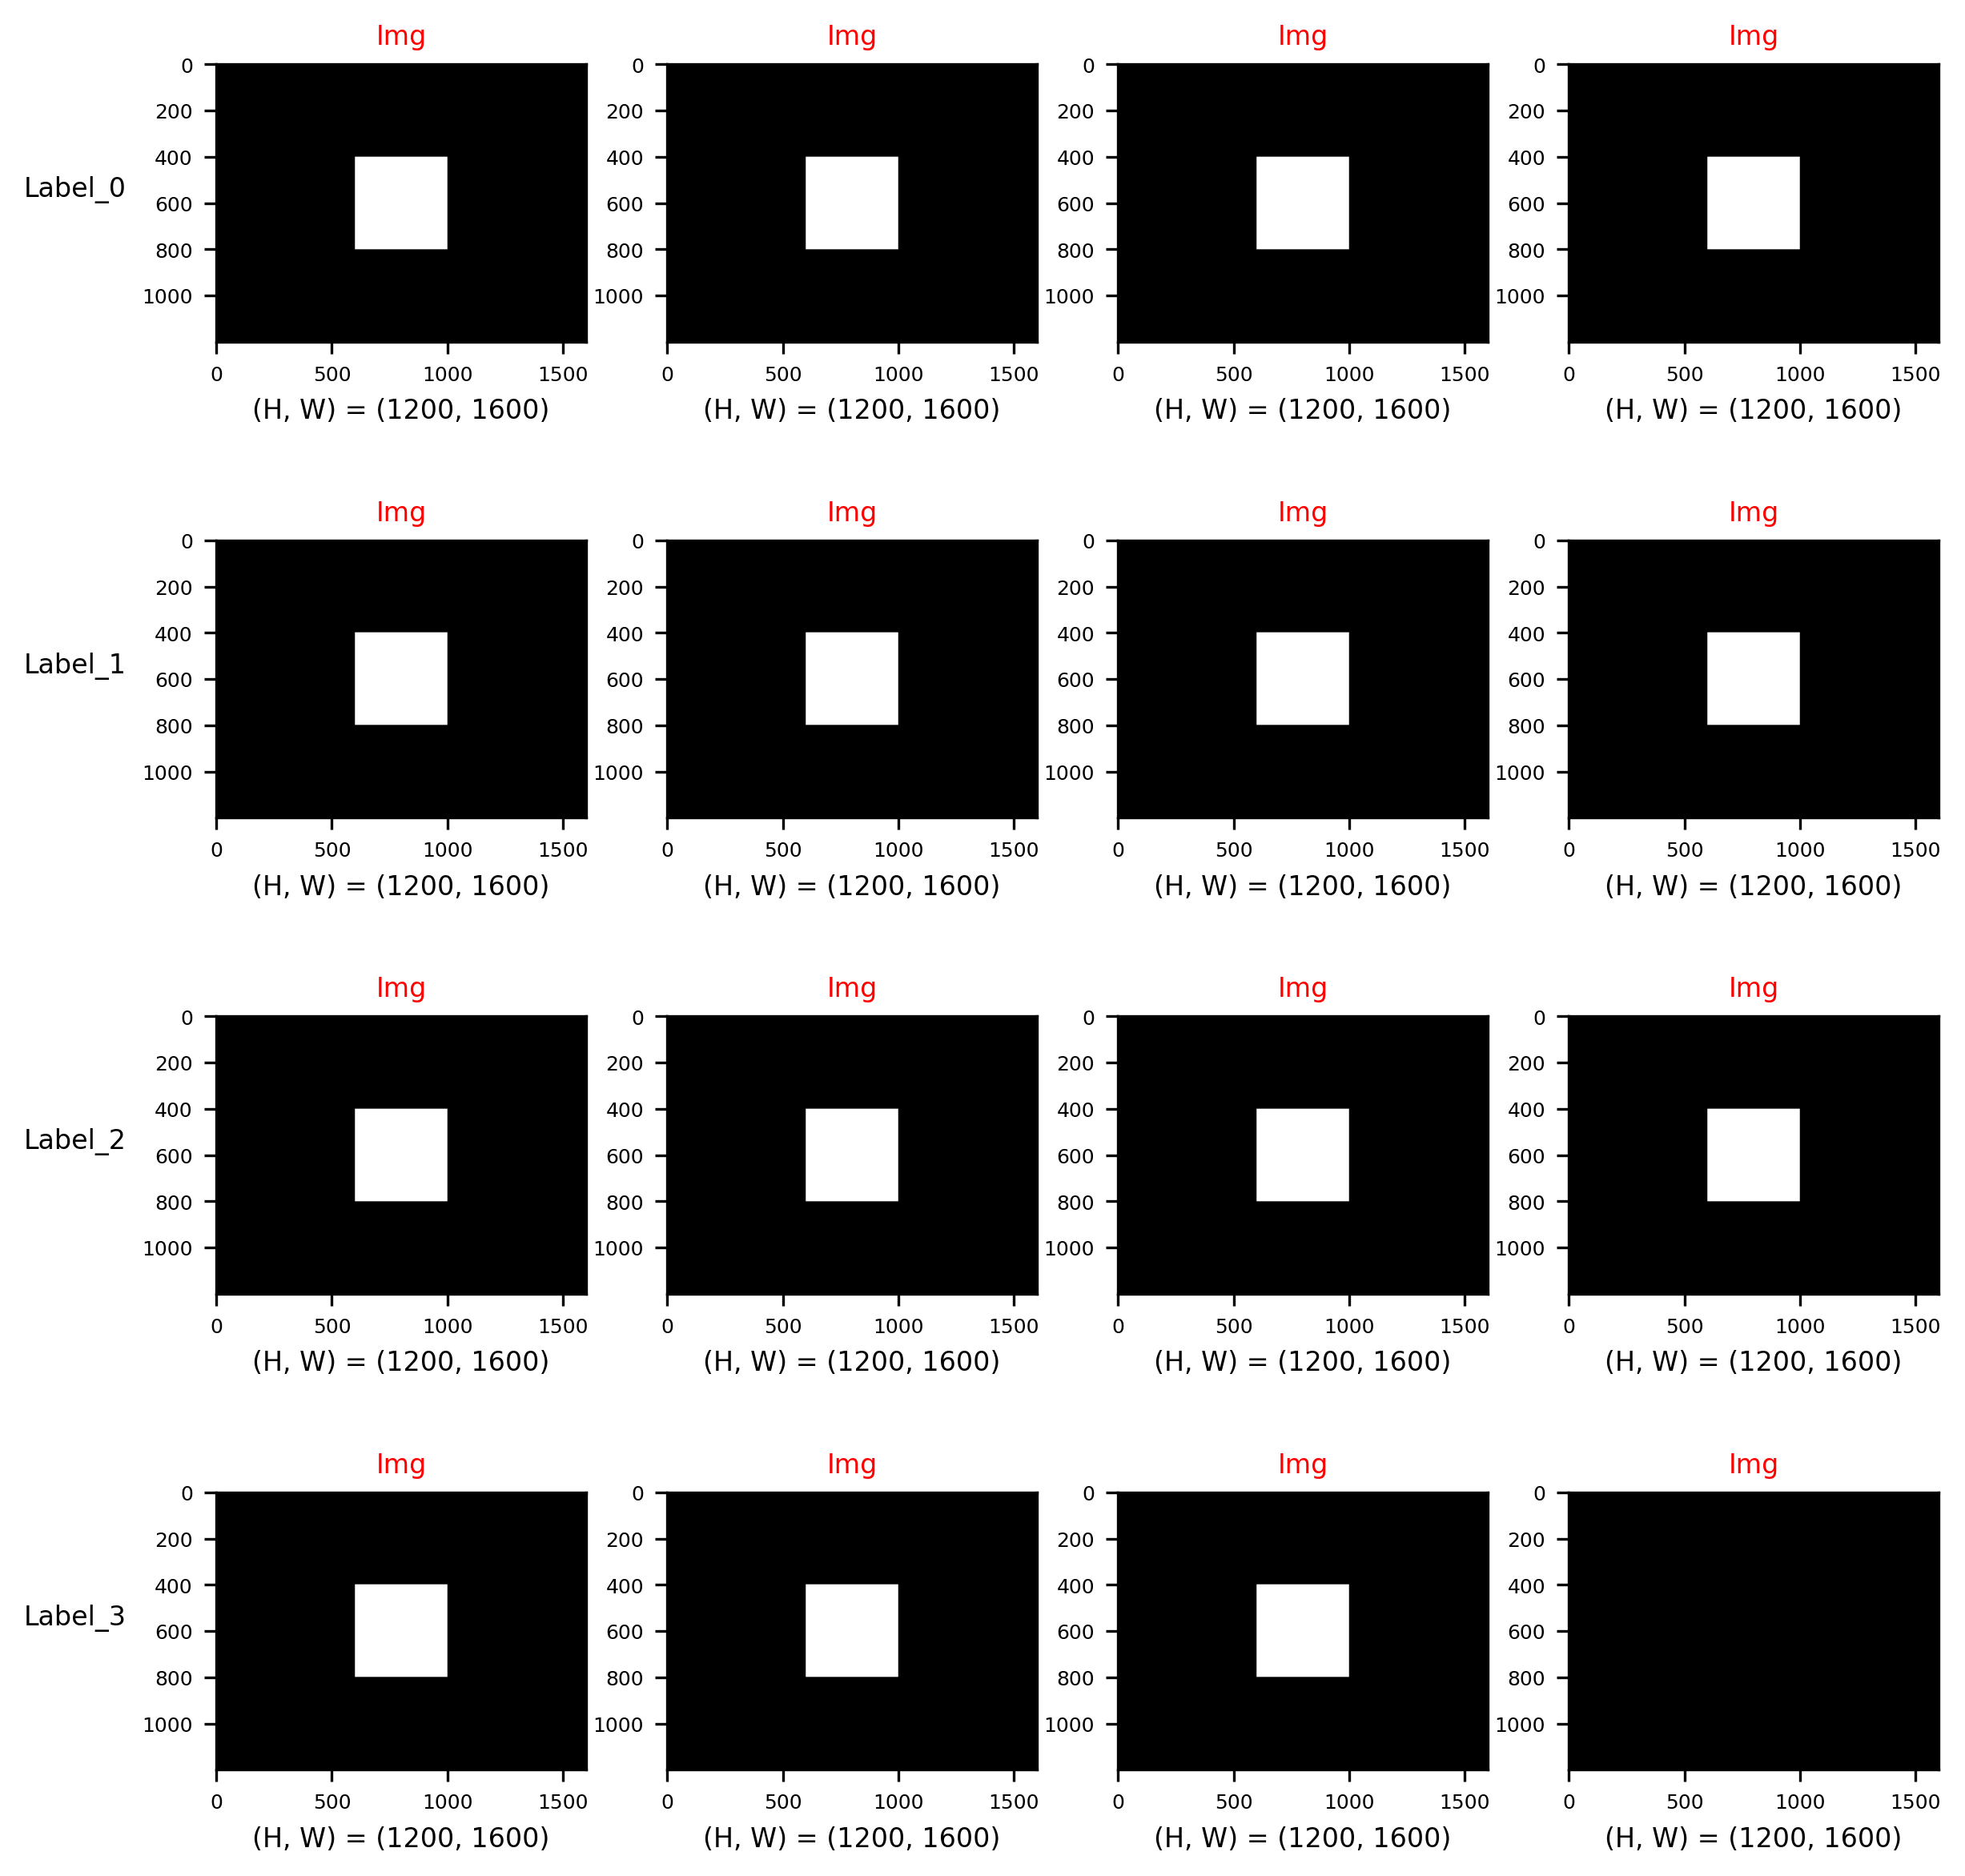

In [170]:
plotax_imgs([img]*15, saveplt='test.png', 
          turnoffaxes=False, 
          tfsize=6)

# Sample Images

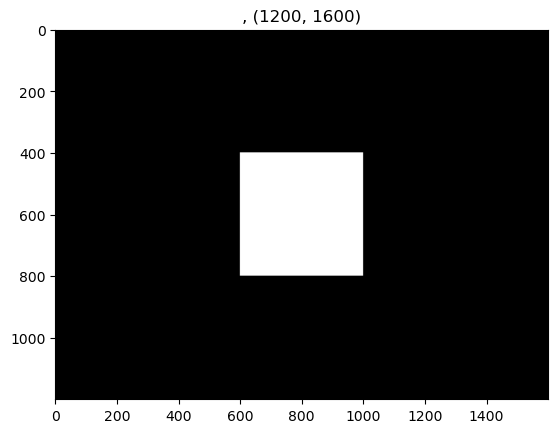

In [185]:
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255
showimg(img)

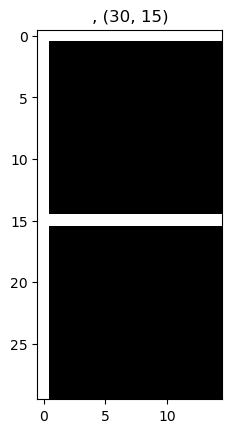

In [187]:
f = np.zeros((30, 15), np.uint8)
hf, wf = f.shape
f[0:hf, 0:1] = 255
f[0:1, 0:wf] = 255
f[hf//2:hf//2+1, 0:wf] = 255
showimg(f)

# DIP

### 1. Resize Img

                     cv2.resize(src, dsize, interpolation)
                     src          :The image to be resized.
                     dsize        :The desired width and height of the resized image.
                     interpolation:The interpolation method to be used.
                     
- The following are comparisons of the different image interpolation algorithms available in OpenCV. The exampes are shown for both upsizing and downsizing images. Also shown is a comparison of the speed of the different algorithms.
- The algorithms are: (descriptions are from the OpenCV documentation)
    - INTER_NEAREST - a nearest-neighbor interpolation
    - INTER_LINEAR - a bilinear interpolation (used by default)
    - INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free - results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
    - INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
    - INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood

In [171]:
methods={
             "area": cv2.INTER_AREA, 
             "nearest": cv2.INTER_NEAREST, 
             "linear": cv2.INTER_LINEAR, 
             "cubic": cv2.INTER_CUBIC, 
             "lanczos4": cv2.INTER_LANCZOS4
}

In [174]:
H, W = img.shape
s=0.5
for key in methods:
    imgr =  cv2.resize(img, (int(W*s), int(H*s)), interpolation=methods[key])
    print(key, img.min(), img.mean(), img.max())
    print(key, imgr.min(), imgr.mean(), imgr.max())

area 0 21.25 255
area 0 21.25 255
nearest 0 21.25 255
nearest 0 21.25 255
linear 0 21.25 255
linear 0 21.25 255
cubic 0 21.25 255
cubic 0 21.250016666666667 255
lanczos4 0 21.25 255
lanczos4 0 21.250033333333334 255


### 2. Image Rotation
- The cv2.getRotationMatrix2D() function is used to create a rotation matrix for an image. It takes the following arguments:
    - The center of rotation for the image.
    - The angle of rotation in degrees.
    - The scale factor.
- The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:
    - The python image to be transformed.
    - The transformation matrix.
    - The output image size.
    
- The rotation angle can be positive or negative. A positive angle rotates the image clockwise, while a negative angle rotates the image counterclockwise.
- The scale factor can be used to scale the image up or down. A scale factor of 1 will keep the image the same size, while a scale factor of 2 will double the size of the python image

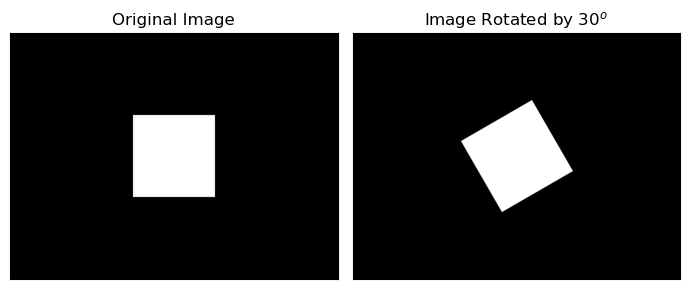

In [176]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = img#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title(f'Image Rotated by ${angle}^o$')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


### 3. Image Translation
- Translating an image means shifting it within a given frame of reference that can be along the x-axis and y-axis.
- To translate an image using OpenCV, we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of translation in each direction.
- The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:
    - The image to be transformed.
    - The transformation matrix.
    - The output image size.
- The translation parameters are specified in the transformation matrix as the tx and ty elements. The tx element specifies the amount of translation in the x-axis, while the ty element specifies the amount of translation in the y-axis.

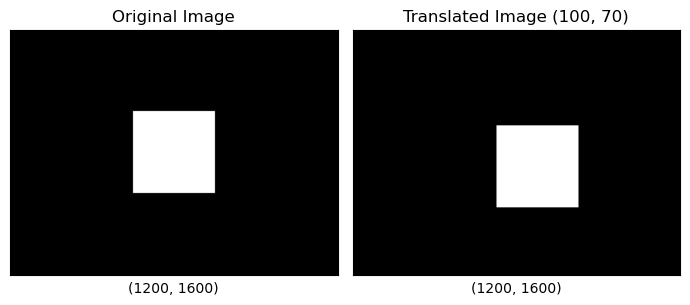

In [183]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = img#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = 100
ty = 70

# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].set_xlabel(f'{image_rgb.shape}')

# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title(f'Translated Image {tx, ty}')
axs[1].set_xlabel(f'{translated_image.shape}')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


In [180]:
contours, _ = cv2.findContours(image_rgb,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.boundingRect(cnt)

(600, 400, 400, 400)

In [181]:
contours, _ = cv2.findContours(translated_image,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.boundingRect(cnt)

(700, 470, 400, 400)

In [182]:
tx = 100
ty = 70
(600+tx, 400+ty)

(700, 470)

### 4. Image Shearing
- Image shearing is a geometric transformation that skews an image along one or both axes i.e x or y axis.
- To shear an image using OpenCV, we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of shearing in each direction.
- The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:
    - The image to be transformed.
    - The transformation matrix.
    - The output image size.
- The shearing parameters are specified in the transformation matrix as the shearX shearY elements. The shearX element specifies the amount of shearing in the x-axis, while the shearY element specifies the amount of shearing in the y-axis.

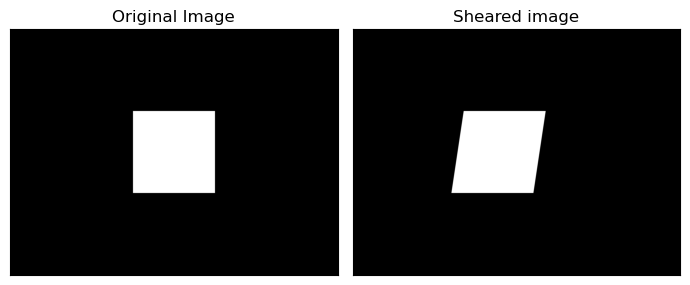

In [184]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image from disk.
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = img#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image shape along X and Y
width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Define the Shearing factor
shearX = -0.15
shearY = 0

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0], 
                                  [0, 1, shearY]], dtype=np.float32)
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


### 5. Image Normalization
- Image normalization is a process of scaling the pixel values in an image to a specific range.This is often done to improve the performance of image processing algorithms, as many algorithms work better when the pixel values are within a certain range.
- In OpenCV, the cv2.normalize() function is used to normalize an image. This function takes the following arguments:
    - The input image.
    - The output image.
    - The minimum and maximum values of the normalized image.
    - The normalization type.
    - The dtype of the output image.
- The normalization type specifies how the pixel values are scaled. There are several different normalization types available, each with its own trade-offs between accuracy and speed.
- Image normalization is a common preprocessing step in many image processing tasks. It can help to improve the performance of algorithms such as image classification, object detection, and image segmentation.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


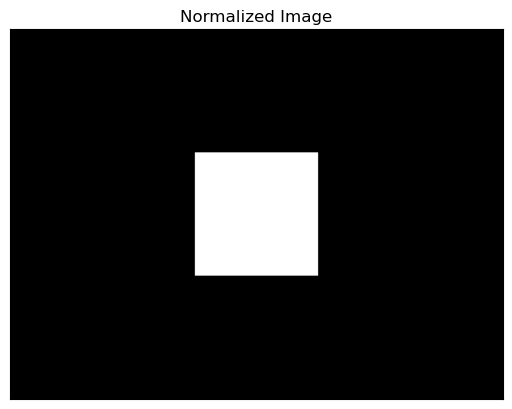

In [188]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image from disk.
img = np.zeros((1200, 1600, 3), np.uint8)
img[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()


### 6. Edge detection of Image
- The process of image edge detection involves detecting sharp edges in the image. This edge detection is essential in the context of image recognition or object localization/detection. There are several algorithms for detecting edges due to its wide applicability.
- In image processing and computer vision applications, Canny Edge Detection is a well-liked edge detection approach. In order to detect edges, the Canny edge detector first smoothes the image to reduce noise, then computes its gradient, and then applies a threshold to the gradient. The multi-stage Canny edge detection method includes the following steps:
    - Gaussian smoothing: The image is smoothed using a Gaussian filter to remove noise.
    - Gradient calculation: The gradient of the image is calculated using the Sobel operator.
    - Non-maximum suppression: Non-maximum suppression is applied to the gradient image to remove spurious edges.
    - Hysteresis thresholding: Hysteresis thresholding is applied to the gradient image to identify strong and weak edges.
- The Canny edge detector is a powerful edge detection algorithm that can produce high-quality edge images. However, it can also be computationally expensive.

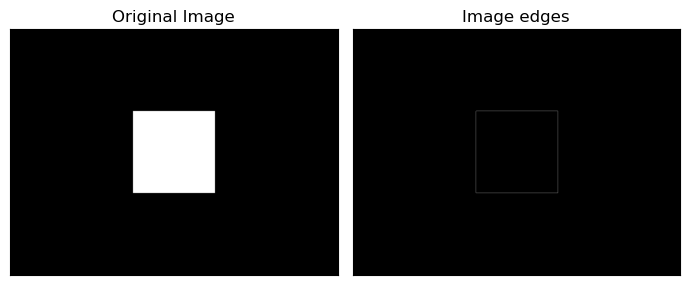

In [189]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read image from disk.
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = img#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


### 7. Image Blurring
- Image blurring is the technique of reducing the detail of an image by averaging the pixel values in the neighborhood. This can be done to reduce noise, soften edges, or make it harder to identify a picture. In many image processing tasks, image blurring is a common preprocessing step. It is useful in the optimization of algorithms such as image classification, object identification, and image segmentation. In OpenCV, a variety of different blurring methods are available, each with a particular trade-off between blurring strength and speed.Some of the most common blurring techniques include:
    - Gaussian blurring: This is a popular blurring technique that uses a Gaussian kernel to smooth out the image.
    - Median blurring: This blurring technique uses the median of the pixel values in a neighborhood to smooth out the image.
    - Bilateral blurring: This blurring technique preserves edges while blurring the image.

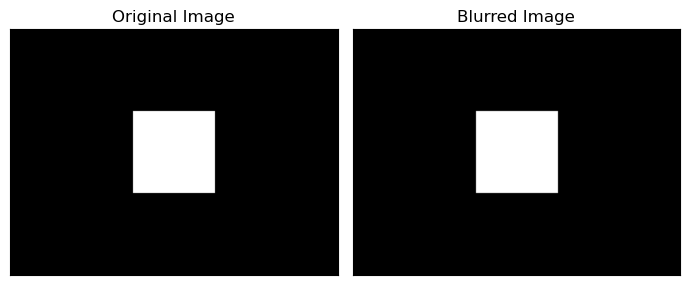

In [191]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image from disk.
image = np.zeros((1200, 1600, 3), np.uint8)
image[400:800, 600:1000] = 255

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Convert blurred image to RGB
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(blurred_rgb)
axs[1].set_title('Blurred Image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


### 8. Morphological Image Processing
- Morphological image processing is a set of python image processing techniques based on the geometry of objects in an image. These procedures are commonly used to eliminate noise, separate objects, and detect edges in images.
- Two of the most common morphological operations are:
    - Dilation: This operation expands the boundaries of objects in an image.
    - Erosion: This operation shrinks the boundaries of objects in an image.
    - Morphological procedures are often used in conjunction with other image processing methods like segmentation and edge detection.

In [197]:
def cnt_img(img):
    contours, _ = cv2.findContours(img,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnt = max(contours, key=cv2.contourArea)
    return cv2.boundingRect(cnt)

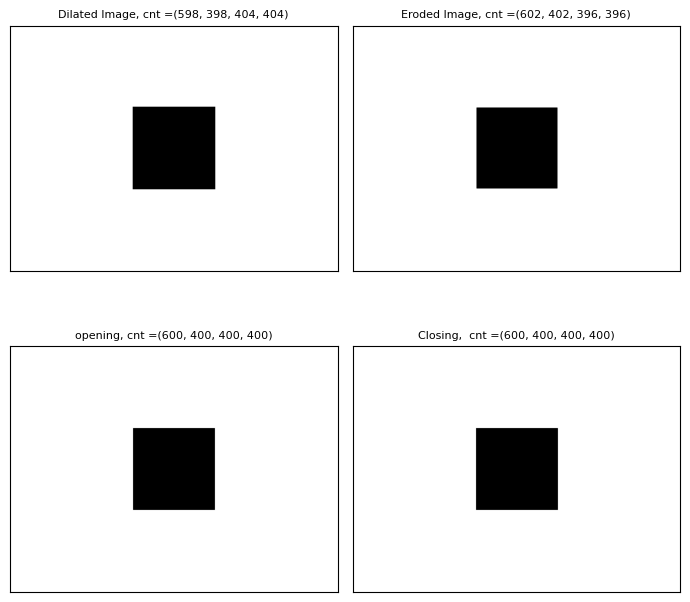

In [199]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image from disk.
image = np.zeros((1200, 1600, 3), np.uint8)
image[400:800, 600:1000] = 255

# Convert BGR image to gray
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a structuring element
kernel = np.ones((3, 3), np.uint8)

# Perform dilation
dilated = cv2.dilate(image_gray, kernel, iterations=2)

# Perform erosion
eroded = cv2.erode(image_gray, kernel, iterations=2)

# Perform opening (erosion followed by dilation)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot the Dilated Image
axs[0,0].imshow(dilated, cmap='Greys')
cnt = cnt_img(dilated)
axs[0,0].set_title(f'Dilated Image, cnt ={cnt}', fontsize=8)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

# Plot the Eroded Image
axs[0,1].imshow(eroded, cmap='Greys')
cnt = cnt_img(eroded)
axs[0,1].set_title(f'Eroded Image, cnt ={cnt}', fontsize=8)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

# Plot the opening (erosion followed by dilation)
axs[1,0].imshow(opening, cmap='Greys')
cnt = cnt_img(opening)
axs[1,0].set_title(f'opening, cnt ={cnt}', fontsize=8)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

# Plot the closing (dilation followed by erosion)
axs[1,1].imshow(closing, cmap='Greys')
cnt = cnt_img(closing)
axs[1,1].set_title(f'Closing,  cnt ={cnt}', fontsize=8)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


# DNN

### 1. Digital Image Processing Basics
- Digital Image Processing means processing digital image by means of a digital computer. We can also say that it is a use of computer algorithms, in order to get enhanced image either to extract some useful information. 
- Digital image processing is the use of algorithms and mathematical models to process and analyze digital images. The goal of digital image processing is to enhance the quality of images, extract meaningful information from images, and automate image-based tasks.
- The basic steps involved in digital image processing are:
    - Image acquisition: This involves capturing an image using a digital camera or scanner, or importing an existing image into a computer.
    - Image enhancement: This involves improving the visual quality of an image, such as increasing contrast, reducing noise, and removing artifacts.
    - Image restoration: This involves removing degradation from an image, such as blurring, noise, and distortion.
    - Image segmentation: This involves dividing an image into regions or segments, each of which corresponds to a specific object or feature in the image.
    - Image representation and description: This involves representing an image in a way that can be analyzed and manipulated by a computer, and describing the features of an image in a compact and meaningful way.
    - Image analysis: This involves using algorithms and mathematical models to extract information from an image, such as recognizing objects, detecting patterns, and quantifying features.
    - Image synthesis and compression: This involves generating new images or compressing existing images to reduce storage and transmission requirements.
    - Digital image processing is widely used in a variety of applications, including medical imaging, remote sensing, computer vision, and multimedia.
    
#### Image processing mainly include the following steps:
1.Importing the image via image acquisition tools; 
2.Analysing and manipulating the image; 
3.Output in which result can be altered image or a report which is based on analysing that image.

#### What is an image?
- An image is defined as a two-dimensional function,F(x,y), where x and y are spatial coordinates, and the amplitude of F at any pair of coordinates (x,y) is called the intensity of that image at that point. When x,y, and amplitude values of F are finite, we call it a digital image. 
- In other words, an image can be defined by a two-dimensional array specifically arranged in rows and columns. 
- Digital Image is composed of a finite number of elements, each of which elements have a particular value at a particular location.These elements are referred to as picture elements,image elements,and pixels.A Pixel is most widely used to denote the elements of a Digital Image.

#### Types of an image
- BINARY IMAGE– The binary image as its name suggests, contain only two pixel elements i.e 0 & 1,where 0 refers to black and 1 refers to white. This image is also known as Monochrome.
- BLACK AND WHITE IMAGE– The image which consist of only black and white color is called BLACK AND WHITE IMAGE.
- 8 bit COLOR FORMAT– It is the most famous image format.It has 256 different shades of colors in it and commonly known as Grayscale Image. In this format, 0 stands for Black, and 255 stands for white, and 127 stands for gray.
- 16 bit COLOR FORMAT– It is a color image format. It has 65,536 different colors in it.It is also known as High Color Format. In this format the distribution of color is not as same as Grayscale image.

A 16 bit format is actually divided into three further formats which are Red, Green and Blue. That famous RGB format. 

#### Image as a Matrix
- As we know, images are represented in rows and columns we have the following syntax in which images are represented: 
$$arr = [[...]]$$
- The right side of this equation is digital image by definition. Every element of this matrix is called image element , picture element , or pixel. 
- In MATLAB the start index is from 1 instead of 0. Therefore, f(1,1) = f(0,0). henceforth the two representation of image are identical, except for the shift in origin. 
- In MATLAB, matrices are stored in a variable i.e X,x,input_image , and so on. The variables must be a letter as same as other programming languages. 

#### PHASES OF IMAGE PROCESSING:
- 1.ACQUISITION– It could be as simple as being given an image which is in digital form. The main work involves: 
    - a) Scaling 
    - b) Color conversion(RGB to Gray or vice-versa) 
- 2.IMAGE ENHANCEMENT– It is amongst the simplest and most appealing in areas of Image Processing it is also used to extract some hidden details from an image and is subjective. 
- 3.IMAGE RESTORATION– It also deals with appealing of an image but it is objective(Restoration is based on mathematical or probabilistic model or image degradation). 
- 4.COLOR IMAGE PROCESSING– It deals with pseudocolor and full color image processing color models are applicable to digital image processing. 
- 5.WAVELETS AND MULTI-RESOLUTION PROCESSING– It is foundation of representing images in various degrees. 
- 6.IMAGE COMPRESSION-It involves in developing some functions to perform this operation. It mainly deals with image size or resolution. 
- 7.MORPHOLOGICAL PROCESSING-It deals with tools for extracting image components that are useful in the representation & description of shape. 
- 8.SEGMENTATION PROCEDURE-It includes partitioning an image into its constituent parts or objects. Autonomous segmentation is the most difficult task in Image Processing. 
- 9.REPRESENTATION & DESCRIPTION-It follows output of segmentation stage, choosing a representation is only the part of solution for transforming raw data into processed data. 
- 10.OBJECT DETECTION AND RECOGNITION-It is a process that assigns a label to an object based on its descriptor. 

#### OVERLAPPING FIELDS WITH IMAGE PROCESSING

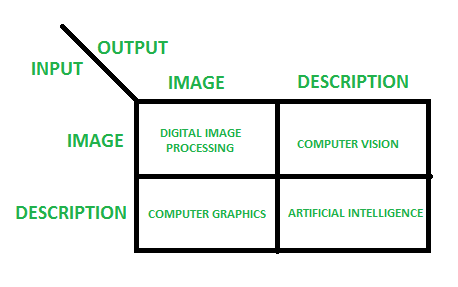

In [200]:
from IPython.display import Image
Image(filename='dipb.png') 


- According to block 1,if input is an image and we get out image as a output, then it is termed as Digital Image Processing. 
- According to block 2,if input is an image and we get some kind of information or description as a output, then it is termed as Computer Vision. 
- According to block 3,if input is some description or code and we get image as an output, then it is termed as Computer Graphics. 
- According to block 4,if input is description or some keywords or some code and we get description or some keywords as a output,then it is termed as Artificial Intelligence 

#### Advantages of Digital Image Processing:
- Improved image quality: Digital image processing algorithms can improve the visual quality of images, making them clearer, sharper, and more informative.
- Automated image-based tasks: Digital image processing can automate many image-based tasks, such as object recognition, pattern detection, and measurement.
- Increased efficiency: Digital image processing algorithms can process images much faster than humans, making it possible to analyze large amounts of data in a short amount of time.
- Increased accuracy: Digital image processing algorithms can provide more accurate results than humans, especially for tasks that require precise measurements or quantitative analysis.

#### Disadvantages of Digital Image Processing:
- High computational cost: Some digital image processing algorithms are computationally intensive and require significant computational resources.
- Limited interpretability: Some digital image processing algorithms may produce results that are difficult for humans to interpret, especially for complex or sophisticated algorithms.
- Dependence on quality of input: The quality of the output of digital image processing algorithms is highly dependent on the quality of the input images. Poor quality input images can result in poor quality output.
- Limitations of algorithms: Digital image processing algorithms have limitations, such as the difficulty of recognizing objects in cluttered or poorly lit scenes, or the inability to recognize objects with significant deformations or occlusions.
- Dependence on good training data: The performance of many digital image processing algorithms is dependent on the quality of the training data used to develop the algorithms. Poor quality training data can result in poor performance of the algorit

### 2. CNN
#### 2.1 CNN | Introduction to Pooling Layer
- The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. 
- For a feature map having dimensions $n_h x n_w x n_c$, the dimensions of output obtained after a pooling layer is 
$$(n_h - f + 1) / s \times (n_w - f + 1)/s \times n_c$$

                where,
                -> nh - height of feature map
                -> nw - width of feature map
                -> nc - number of channels in the feature map
                -> f  - size of filter
                -> s  - stride length
                
- A common CNN model architecture is to have a number of convolution and pooling layers stacked one after the other. Why to use Pooling Layers?
    - Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
    - The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image. 
- Types of Pooling Layers:
     - **Max Pooling**: Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map. 
     - **Average Pooling**: Average pooling computes the average of the elements present in the region of feature map covered by the filter. Thus, while max pooling gives the most prominent feature in a particular patch of the feature map, average pooling gives the average of features present in a patch.
     - **Global Pooling**: Global pooling reduces each channel in the feature map to a single value. Thus, an $n_h \times n_w \times n_c$ feature map is reduced to $1 \times 1 \times n_c$ feature map. This is equivalent to using a filter of dimensions $n_h \times n_w$ i.e. the dimensions of the feature map. 
Further, it can be either global max pooling or global average pooling.

In [205]:
#!pip install keras
# !pip install tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D

# define input image
image = np.array([[2, 2, 7, 3],
                    [9, 4, 6, 1],
                    [8, 5, 2, 4],
                    [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define model containing just a single max pooling layer
model = Sequential(
        [MaxPooling2D(pool_size = 2, strides = 2)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[9. 7.]
 [8. 6.]]


In [206]:
import numpy as np
from keras.models import Sequential
from keras.layers import AveragePooling2D

# define input image
image = np.array([[2, 2, 7, 3],
                    [9, 4, 6, 1],
                    [8, 5, 2, 4],
                    [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define model containing just a single average pooling layer
model = Sequential(
        [AveragePooling2D(pool_size = 2, strides = 2)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[4.25 4.25]
 [4.25 3.5 ]]


In [207]:
import numpy as np
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

# define input image
image = np.array([[2, 2, 7, 3],
                    [9, 4, 6, 1],
                    [8, 5, 2, 4],
                    [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define gm_model containing just a single global-max pooling layer
gm_model = Sequential(
        [GlobalMaxPooling2D()])

# define ga_model containing just a single global-average pooling layer
ga_model = Sequential(
        [GlobalAveragePooling2D()])

# generate pooled output
gm_output = gm_model.predict(image)
ga_output = ga_model.predict(image)

# print output image
gm_output = np.squeeze(gm_output)
ga_output = np.squeeze(ga_output)
print("gm_output: ", gm_output)
print("ga_output: ", ga_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
gm_output:  9.0
ga_output:  4.0625


In convolutional neural networks (CNNs), the pooling layer is a common type of layer that is typically added after convolutional layers. The pooling layer is used to reduce the spatial dimensions (i.e., the width and height) of the feature maps, while preserving the depth (i.e., the number of channels).

- The pooling layer works by dividing the input feature map into a set of non-overlapping regions, called pooling regions. Each pooling region is then transformed into a single output value, which represents the presence of a particular feature in that region. The most common types of pooling operations are max pooling and average pooling.
- In max pooling, the output value for each pooling region is simply the maximum value of the input values within that region. This has the effect of preserving the most salient features in each pooling region, while discarding less relevant information. Max pooling is often used in CNNs for object recognition tasks, as it helps to identify the most distinctive features of an object, such as its edges and corners.
- In average pooling, the output value for each pooling region is the average of the input values within that region. This has the effect of preserving more information than max pooling, but may also dilute the most salient features. Average pooling is often used in CNNs for tasks such as image segmentation and object detection, where a more fine-grained representation of the input is required.
- Pooling layers are typically used in conjunction with convolutional layers in a CNN, with each pooling layer reducing the spatial dimensions of the feature maps, while the convolutional layers extract increasingly complex features from the input. The resulting feature maps are then passed to a fully connected layer, which performs the final classification or regression task.

**Advantages of Pooling Layer**:

- Dimensionality reduction: The main advantage of pooling layers is that they help in reducing the spatial dimensions of the feature maps. This reduces the computational cost and also helps in avoiding overfitting by reducing the number of parameters in the model.
- Translation invariance: Pooling layers are also useful in achieving translation invariance in the feature maps. This means that the position of an object in the image does not affect the classification result, as the same features are detected regardless of the position of the object.
- Feature selection: Pooling layers can also help in selecting the most important features from the input, as max pooling selects the most salient features and average pooling preserves more information.

**Disadvantages of Pooling Layer**:
- Information loss: One of the main disadvantages of pooling layers is that they discard some information from the input feature maps, which can be important for the final classification or regression task.
- Over-smoothing: Pooling layers can also cause over-smoothing of the feature maps, which can result in the loss of some fine-grained details that are important for the final classification or regression task.
- Hyperparameter tuning: Pooling layers also introduce hyperparameters such as the size of the pooling regions and the stride, which need to be tuned in order to achieve optimal performance. This can be time-consuming and requires some expertise in model building.

#### 2.2 Convolutional Layer

In [208]:
import tensorflow as tf 

# Display the version
print(tf.__version__)	 

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.16.2


### 1. Train a DNN Model That Detects letter F

- Data Set

In [209]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


- Train and Test data

In [210]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


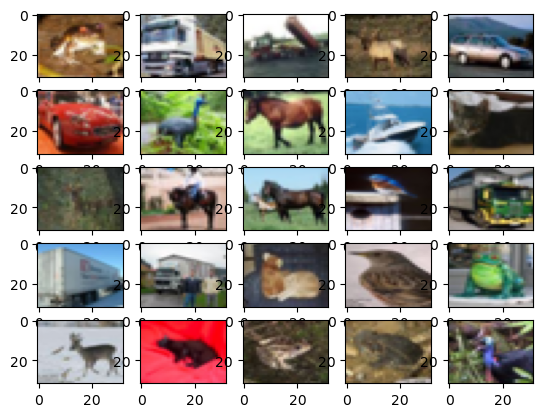

In [211]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


- Build The CNN Model

In [212]:
# number of classes
K = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

- Add Optimizer to Model

- Our model is now ready, it’s time to compile it. We are using model.compile() function to compile our model. For the parameters, we are using 
    - adam optimizer
    - sparse_categorical_crossentropy as the loss function
    - metrics=[‘accuracy’]

In [214]:
# Compile
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


- Fit CNN Model
    - Now let’s fit our model using model.fit() passing all our data to it. We are going to train our model till 50 epochs, it gives us a fair result though you can tweak it if you want.

In [215]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 487s 309ms/step - accuracy: 0.4636 - loss: 1.6719 - val_accuracy: 0.6369 - val_loss: 1.0784
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20041s 13s/step - accuracy: 0.7004 - loss: 0.8612 - val_accuracy: 0.6973 - val_loss: 0.8762
Epoch 3/50
 589/1563 ━━━━━━━━━━━━━━━━━━━━ 1:40 103ms/step - accuracy: 0.7464 - loss: 0.7217

KeyboardInterrupt: 

- After this, our model is trained. Though it will work fine but to make our model much more accurate we can add data augmentation on our data and then train it again. Calling model.fit() again on augmented data will continue training where it left off. We are going to fir our data on a batch size of 32 and we are going to shift the range of width and height by 0.1 and flip the images horizontally. Then call model.fit again for 50 epochs.

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
                steps_per_epoch=steps_per_epoch, epochs=50)


- Now we have trained our model, before making any predictions from it let’s visualize the accuracy per iteration for better analysis. Though there are other methods that include confusion matrix for better analysis of the model.

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()